In [1]:
import random
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

## Red Neuronal (6 neuronas capa unica)

In [2]:
#Funcion de activacion 
fa = lambda x: 1/(1+np.e**(-x))

#inicializamos pesos y bias
w0,w1,w2,w3,w4,w5 = 0.25, 0.98, 1.20, 0.25, 0.98, 1.20
b0,b1,b2,b3,b4,b5 = 1, 1, 1, 1, 1, 1

In [3]:
#Se construyen los parametros de entrada y de salida 
#Generacion de los datos
X =np.array(np.linspace(-4, 4, 20))
X = X[:,np.newaxis]
#Pendiente (m), Corte en Y(b), Valores de Y sin ruido(_Y)
m , b = 0.5, 1
_Y = np.sin(b +m*X)
#Genera el ruido en los valores de _Y
Y=[]
for i in range(len(X)):
   a = _Y[i] + ( (-1)**( (i%2)+2) )   *0.1*random.random()
   Y.append(a)

Y=np.array(Y)

Valor Inicial del Error Cuadratico:  278.45273063556454
Valor Intermedio del Error Cuadratico:  275.40536830578014
Valor Intermedio del Error Cuadratico:  3.8070131086731647
Valor Intermedio del Error Cuadratico:  3.4529253728576235
Valor Final del Error Cuadratico:  3.411863812189784 

Valores Finales de Pesos y Sesgos para la red neuronal
 W0= -0.0021124974307984387 W1= -0.0021124710148864435 W2= 2.6156310596090875 W3= -0.0021125368019012593 W4= -0.0021125094016965587 W5= -0.0021125068810659213 
 B0= -6.895752791620885 B1= -6.887435114574215 B2= 2.259350931320283 B3= -6.895726535192866 B4= -6.8871352734581395 B5= -6.88717820925112 



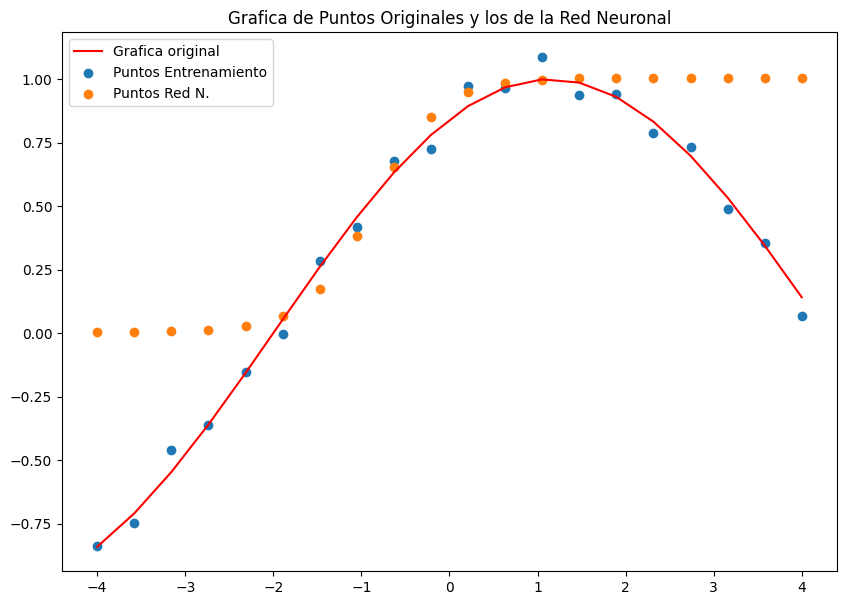

In [4]:
#Forward pass
Yred = fa((w0*X)+b0) + fa((w1*X)+b1) + fa((w2*X)+b2) + fa((w3*X)+b3) + fa((w4*X)+b4) + fa((w5*X)+b5)

print("Valor Inicial del Error Cuadratico: ", np.sum((Y - Yred)**2))

#Funcion de error cuadratico de la red 
def Error(w0,w1,w2,w3,w4,w5,b0,b1,b2,b3,b4,b5):
  return np.sum( (  Y - (  fa((w0*X)+b0) + fa((w1*X)+b1) + fa((w2*X)+b2) + fa((w3*X)+b3) + fa((w4*X)+b4) + fa((w5*X)+b5)  )  )**2 )

#Descenso del gradiente aplicado a la salida de la red
lr = 0.1
h = 0.01

#COMETARIO: con 1 millon de iteraciones el error fue de 3.53
#Produce el mismo resultado que con 3 neuronas
for i in range(60000):
  w0 = w0 - lr* (Error(w0+h,w1,w2,w3,w4,w5,b0,b1,b2,b3,b4,b5) - Error(w0-h,w1,w2,w3,w4,w5,b0,b1,b2,b3,b4,b5))
  w1 = w1 - lr* (Error(w0,w1+h,w2,w3,w4,w5,b0,b1,b2,b3,b4,b5) - Error(w0,w1-h,w2,w3,w4,w5,b0,b1,b2,b3,b4,b5))
  w2 = w2 - lr* (Error(w0,w1,w2+h,w3,w4,w5,b0,b1,b2,b3,b4,b5) - Error(w0,w1,w2-h,w3,w4,w5,b0,b1,b2,b3,b4,b5))
  w3 = w3 - lr* (Error(w0,w1,w2,w3+h,w4,w5,b0,b1,b2,b3,b4,b5) - Error(w0,w1,w2,w3-h,w4,w5,b0,b1,b2,b3,b4,b5))
  w4 = w4 - lr* (Error(w0,w1,w2,w3,w4+h,w5,b0,b1,b2,b3,b4,b5) - Error(w0,w1,w2,w3,w4-h,w5,b0,b1,b2,b3,b4,b5))
  w5 = w4 - lr* (Error(w0,w1,w2,w3,w4,w5+h,b0,b1,b2,b3,b4,b5) - Error(w0,w1,w2,w3,w4,w5-h,b0,b1,b2,b3,b4,b5))

  b0 = b0 - lr* (Error(w0,w1,w2,w3,w4,w5,b0+h,b1,b2,b3,b4,b5) - Error(w0,w1,w2,w3,w4,w5,b0-h,b1,b2,b3,b4,b5))
  b1 = b1 - lr* (Error(w0,w1,w2,w3,w4,w5,b0,b1+h,b2,b3,b4,b5) - Error(w0,w1,w2,w3,w4,w5,b0,b1-h,b2,b3,b4,b5))
  b2 = b2 - lr* (Error(w0,w1,w2,w3,w4,w5,b0,b1,b2+h,b3,b4,b5) - Error(w0,w1,w2,w3,w4,w5,b0,b1,b2-h,b3,b4,b5)) 
  b3 = b3 - lr* (Error(w0,w1,w2,w3,w4,w5,b0,b1,b2,b3+h,b4,b5) - Error(w0,w1,w2,w3,w4,w5,b0,b1,b2,b3-h,b4,b5)) 
  b4 = b4 - lr* (Error(w0,w1,w2,w3,w4,w5,b0,b1,b2,b3,b4+h,b5) - Error(w0,w1,w2,w3,w4,w5,b0,b1,b2,b3,b4-h,b5)) 
  b5 = b5 - lr* (Error(w0,w1,w2,w3,w4,w5,b0,b1,b2,b3,b4,b5+h) - Error(w0,w1,w2,w3,w4,w5,b0,b1,b2,b3,b4,b5-h)) 

  if (i % 20000 == 0):
     print("Valor Intermedio del Error Cuadratico: ", np.sum( (  Y - (  fa((w0*X)+b0) + fa((w1*X)+b1) + fa((w2*X)+b2) + fa((w3*X)+b3) + fa((w4*X)+b4) + fa((w5*X)+b5)  )  )**2 )) 

print("Valor Final del Error Cuadratico: ", np.sum( (  Y - (  fa((w0*X)+b0) + fa((w1*X)+b1) + fa((w2*X)+b2) + fa((w3*X)+b3) + fa((w4*X)+b4) + fa((w5*X)+b5)  )  )**2 ), "\n")

print("Valores Finales de Pesos y Sesgos para la red neuronal")
print(" W0=", w0, "W1=", w1, "W2=", w2, "W3=", w3, "W4=", w4,"W5=", w5, "\n", "B0=", b0,"B1=", b1, "B2=", b2, "B3=", b3, "B4=", b4, "B5=", b5, "\n")

#Graficas de los puntos originales y los de la red neuronal
fig = plt.figure(figsize=(10,7))
plt.title("Grafica de Puntos Originales y los de la Red Neuronal") 
plt.plot(X,_Y, color='red')
plt.scatter(X,Y)
plt.scatter(X,fa((w0*X)+b0) + fa((w1*X)+b1) + fa((w2*X)+b2) + fa((w3*X)+b3) + fa((w4*X)+b4) + fa((w5*X)+b5))
plt.legend(["Grafica original","Puntos Entrenamiento","Puntos Red N."])
plt.show()


### Red Neuronal (2 capas intermedias de 3 neuronas c/u, 1 entrada, 1 salida)

Sin matrices

In [8]:
#Se construyen los parametros de entrada y de salida
#Generacion de los datos
X =np.array(np.linspace(-4, 4, 20000))
X = X[:,np.newaxis]
#Pendiente (m), Corte en Y(b), Valores de Y sin ruido(_Y)
m , b = 0.5, 1
_Y = np.sin(b +m*X)
#Genera el ruido en los valores de _Y
Y=[]
for i in range(len(X)):
   a = _Y[i] + ( (-1)**( (i%2)+2) )   *0.1*random.random()
   Y.append(a)

Y=np.array(Y)

In [9]:
#Divide el dataset en entrenamiento y testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test, = train_test_split(X, Y, test_size=0.02, random_state=0)

#Funcion de activacion y derivada
fa = (lambda x: 1/(1+np.e**(-x)),
      lambda x: np.e**(-x)/(1+np.e**(-x)) **2  )

#Error cuadratico y derivada
error = (lambda a, Y: (a - Y)**2,
        lambda a, Y: 2*(a - Y) )

#Inicializacion de los pesos y los bias
#Entrada - 1ra Capa
w111=0.25;w112=0.85;w113=0.75
b11=1;b12=1;b13=1

#2da Capa
w211=0.1;w212=0.2;w213=0.3;w221=0.7;w222=0.9;w223=0.25;w231=0.31;w232=0.64;w233=0.87
b21=1;b22=1;b23=1

#3ra Capa
w311=0.42;w321=0.36;w331=0.78
b31=1


Epoch - 0 - Error:  [0.49222145]
Epoch - 20 - Error:  [0.15080405]
Epoch - 40 - Error:  [0.14884157]
Epoch - 60 - Error:  [0.14859139]
Epoch - 80 - Error:  [0.14850632]
Epoch - 100 - Error:  [0.14846417]


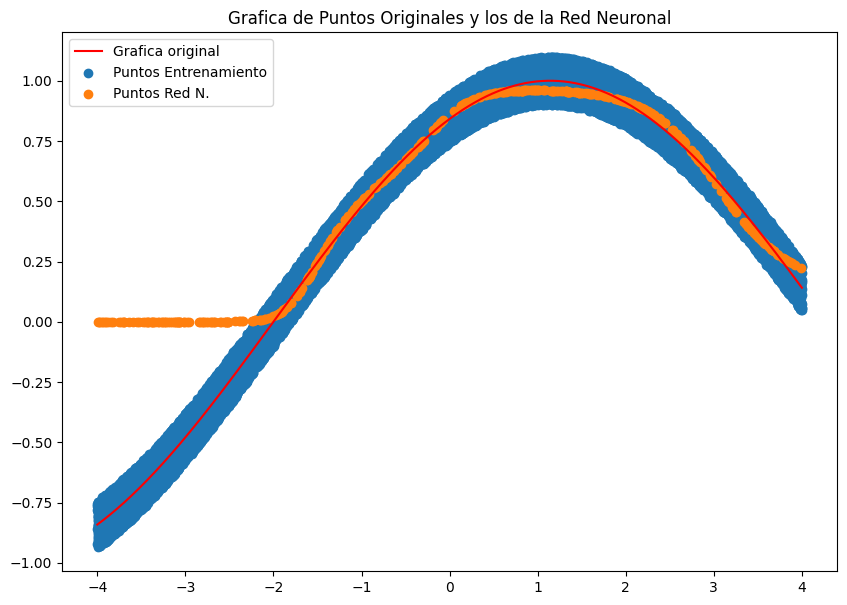

In [10]:
#Entremaniento
EPOCH = 100

for l in range(EPOCH+1):

    for i in range(len(x_train)):
        e=[]
#FORWARD PASS
        #combinacion lineal de la capa 1
        z11 = (w111*x_train[i]) + b11
        z12 = (w112*x_train[i]) + b12
        z13 = (w113*x_train[i]) + b13
        #salida de capa 1
        a11 = fa[0](z11)
        a12 = fa[0](z12)
        a13 = fa[0](z13)

        #combinacion lineal de la capa 2
        z21 = (w211*a11) + (w221*a12) + (w231*a13) + b21
        z22 = (w212*a11) + (w222*a12) + (w232*a13) + b22
        z23 = (w213*a11) + (w223*a12) + (w233*a13) + b23
        #salida de capa 2
        a21 = fa[0](z21)
        a22 = fa[0](z22)
        a23 = fa[0](z23)

        #combinacion lineal de la capa 3
        z31 = (w311*a21) + (w321*a22) + (w331*a23) + b31
        #Salida de capa 3 - Ultima capa
        a3=fa[0](z31)

        e.append(error[0](a3,y_train[i]))

#BACK PROPAGATION - DESCENSO DEL GRADIENTE
        lr = 0.01
        delta = error[1](a3,y_train[i])*fa[1](z31)

        #Ultima Capa - Salida
        w311 = w311 - lr*delta*a21
        w321 = w321 - lr*delta*a22
        w331 = w331 - lr*delta*a23

        b31 = b31 - lr*delta

        #Penulntima Capa - Capa Intermedia
        w211 = w211 - lr*delta*w311*fa[1](z21)*a11
        w221 = w221 - lr*delta*w311*fa[1](z21)*a12
        w231 = w231 - lr*delta*w311*fa[1](z21)*a13

        w212 = w212 - lr*delta*w321*fa[1](z22)*a11
        w222 = w222 - lr*delta*w321*fa[1](z22)*a12
        w232 = w232 - lr*delta*w321*fa[1](z22)*a13

        w213 = w213 - lr*delta*w331*fa[1](z23)*a11
        w223 = w223 - lr*delta*w331*fa[1](z23)*a12
        w233 = w233 - lr*delta*w331*fa[1](z23)*a13

        b21 = b21 - lr*delta*w311*fa[1](z21)
        b22 = b22 - lr*delta*w321*fa[1](z22)
        b23 = b23 - lr*delta*w331*fa[1](z23)

        #Antepenultima Capa - Entrada
        w111 = w111 - lr*delta*( (w311*fa[1](z21)*w211) + (w321*fa[1](z22)*w212) + (w331*fa[1](z23)*w213) )*fa[1](z11)*x_train[i]
        w112 = w112 - lr*delta*( (w311*fa[1](z21)*w221) + (w321*fa[1](z22)*w222) + (w331*fa[1](z23)*w223) )*fa[1](z12)*x_train[i]
        w113 = w113 - lr*delta*( (w311*fa[1](z21)*w231) + (w321*fa[1](z22)*w232) + (w331*fa[1](z23)*w233) )*fa[1](z13)*x_train[i]

        b11 = b11 - lr*delta*( (w311*fa[1](z21)*w211) + (w321*fa[1](z22)*w212) + (w331*fa[1](z23)*w213) )*fa[1](z11)
        b12 = b12 - lr*delta*( (w311*fa[1](z21)*w221) + (w321*fa[1](z22)*w222) + (w331*fa[1](z23)*w223) )*fa[1](z12)
        b13 = b13 - lr*delta*( (w311*fa[1](z21)*w231) + (w321*fa[1](z22)*w232) + (w331*fa[1](z23)*w233) )*fa[1](z13)

    if l%20 == 0:
       print("Epoch -", l , "- Error: ", sum(e) )

#Foward Pass de la red entrenada
y_salida=[]

for i in range(len(x_test)):
#FORWARD PASS
    #combinacion lineal de la capa 1
    z11 = (w111*x_test[i]) + b11
    z12 = (w112*x_test[i]) + b12
    z13 = (w113*x_test[i]) + b13
    #salida de capa 1
    a11 = fa[0](z11)
    a12 = fa[0](z12)
    a13 = fa[0](z13)

    #combinacion lineal de la capa 2
    z21 = (w211*a11) + (w221*a12) + (w231*a13) + b21
    z22 = (w212*a11) + (w222*a12) + (w232*a13) + b22
    z23 = (w213*a11) + (w223*a12) + (w233*a13) + b23
    #salida de capa 2
    a21 = fa[0](z21)
    a22 = fa[0](z22)
    a23 = fa[0](z23)

    #combinacion lineal de la capa 3
    z31 = (w311*a21) + (w321*a22) + (w331*a23) + b31
    #Salida de capa 3 - Ultima capa
    a3=fa[0](z31)
    y_salida.append(a3)

#Graficas de los puntos originales y los de la red neuronal
fig = plt.figure(figsize=(10,7))
plt.title("Grafica de Puntos Originales y los de la Red Neuronal")
plt.plot(X,_Y, color='red')
plt.scatter(X,Y)
plt.scatter(x_test,y_salida)
plt.legend(["Grafica original","Puntos Entrenamiento","Puntos Red N."])
plt.show()

### Red Neuronal (2 capas intermedias de 3 neuronas c/u, 1 entrada, 1 salida)

Con matrices

In [5]:
#Se construyen los parametros de entrada y de salida 
#Generacion de los datos
X =np.array(np.linspace(-4, 4, 20000))
X = X[:,np.newaxis]
#Pendiente (m), Corte en Y(b), Valores de Y sin ruido(_Y)
m , b = 0.5 , 1
_Y = np.sin(b +m*X)
#Genera el ruido en los valores de _Y
Y=[]
for i in range(len(X)):
   a = _Y[i] + ( (-1)**( (i%2)+2) )   *0.1*random.random()
   Y.append(a)

Y=np.array(Y)

In [6]:
#Divide el dataset en entrenamiento y testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test, = train_test_split(X, Y, test_size=0.02, random_state=0) 

#Funcion de activacion y derivada
fa = (lambda x: 1/(1+np.e**(-x)),
      lambda x: np.e**(-x)/(1+np.e**(-x)) **2  )

#Error cuadratico y derivada
error = (lambda a, Y: (a - Y)**2,  
        lambda a, Y:  2*(a - Y))

#Inicializacion de los pesos y los bias
#Entrada - Toca transporner la salida (1x3) -> (3x1)
W1 = np.array([0.25,0.85,0.75])
W1 = np.reshape(W1,(1,3))
B1 = np.array([1,1,1])
B1 = np.reshape(B1,(1,3))
#2ra Capa
W2 = np.array([[0.1,0.2,0.3,],[0.7,0.9,0.25],[0.31,0.64,0.87]])
B2 = np.array([[1,1,1]])
#3da Capa
W3 = np.array([0.42,0.36,0.78])
W3 = np.reshape(W3,(1,3))
B3 = np.array([[1]])

Epoch - 0 - Error:  0.4913900701068952
Epoch - 10 - Error:  0.15260132883592079
Epoch - 20 - Error:  0.15156270424044632
Epoch - 30 - Error:  0.15002845434296652
Epoch - 40 - Error:  0.1496051652439564
Epoch - 50 - Error:  0.14944489703114897
Epoch - 60 - Error:  0.14936194822547547
Epoch - 70 - Error:  0.14931169772153732
Epoch - 80 - Error:  0.1492781899240806
Epoch - 90 - Error:  0.14925431824708826
Epoch - 100 - Error:  0.1492364476969489


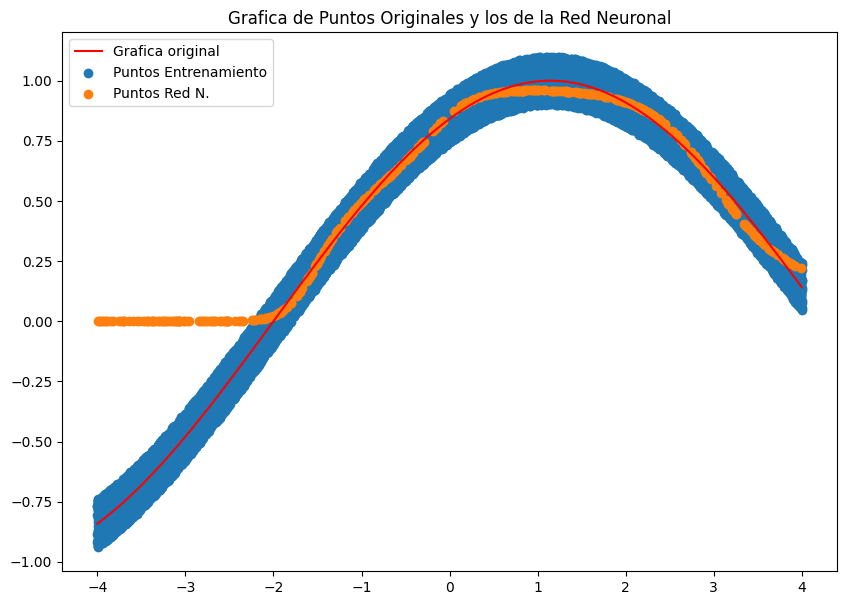

In [7]:
#Entremaniento
#EPOCH

EPOCH = 100

for l in range(EPOCH+1):
   
    for i in range(len(x_train)):
       e=[]
#Foward Pass
  #Entrada-Primera Capa
       z1 = (W1*x_train[i]) + B1
       a1 = fa[0](z1)      
  #Segunda Capa
       z2 = (a1@W2) + B2
       a2 = fa[0](z2)
  #Tercera Capa - Salida
       z3 = (W3@(a2.T)) + B3
       a3 = fa[0](z3)
       
       e.append(error[0](a3,y_train[i]))

#BackPropagation - Descenso del Gradiente

       delta = error[1](a3,y_train[i]) * fa[1](z3) # (1,1)

  #Ultima Capa - Salida
       lr=0.01
       W3 = W3 - lr*delta*a2 #(1,3)
       B3 = B3 - lr*delta  #(1,1)

  #Penultima Capa
       W2 = W2 - lr*delta*W3*fa[1](z2) * (a1.T) #(3,3)
       B2 = B2 - lr*delta*W3*fa[1](z2) #(1,3)

  #Antepenultima Capa - Entrada
       W1 = W1 - ( ( lr*delta*W3*fa[1](z2) ) @ W2.T )*fa[1](z1) * x_train[i] #(1,3)
       B1 = B1 - ( ( lr*delta*W3*fa[1](z2) ) @ W2.T )*fa[1](z1) #(1,3)
     
   
    if l%10 == 0:
       print("Epoch -", l , "- Error: ", np.sum(e) )

 #Foward Pass de la red entrenada
y_salida=[]

for i in range(len(x_test)):

#Foward Pass
  #Entrada-Primera Capa
  z1 = (W1*x_test[i]) + B1
  a1 = fa[0](z1)      
  #Segunda Capa
  z2 = (a1@W2) + B2
  a2 = fa[0](z2)
  #Tercera Capa - Salida
  z3 = (W3@(a2.T)) + B3
  a3 = fa[0](z3)
  y_salida.append(a3)


#Graficas de los puntos originales y los de la red neuronal
fig = plt.figure(figsize=(10,7))
plt.title("Grafica de Puntos Originales y los de la Red Neuronal") 
plt.plot(X,_Y, color='red')
plt.scatter(X,Y)
plt.scatter(x_test,y_salida)
plt.legend(["Grafica original","Puntos Entrenamiento","Puntos Red N."])
plt.show()
